In [1]:
!pip install opencv-python matplotlib numpy


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/b7/8a/b2f7e1a434d56bf1d7570fc5941ace0847404e1032d7f1f0b8fed896568d/opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b5/24/aaccf324ce862bb82277e8814d2aebbb2a2c160d04e95aa2b8c9dc3137a9/matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/9b/5a/f265a1ba3641d16b5480a217a6aed08cceef09cd173b568cd5351053472a/numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.0-cp310-cp310-

In [2]:
import cv2 as cv
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

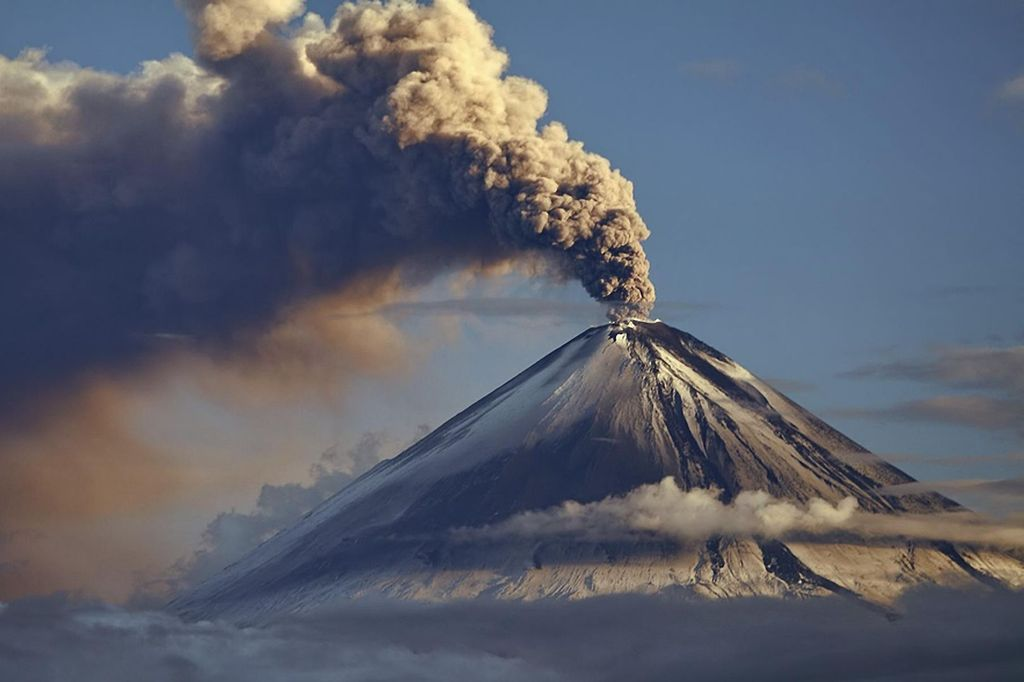

In [3]:
# 1) Загрузите изображение и выведите на экран помощью PIL

image_pil = pil.Image.open('img.png', mode='r')
image_pil

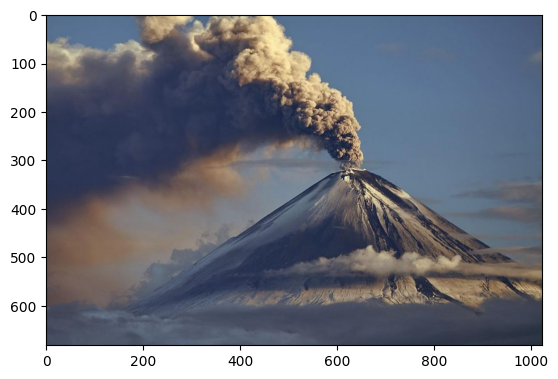

In [4]:
# 2) Загрузите изображение с использованием OpenCV и выполните визуализацию с помощью matplotlib
image_cv = cv.imread('img.png')
plt.imshow(
    cv.cvtColor(image_cv, cv.COLOR_BGR2RGBA)
)

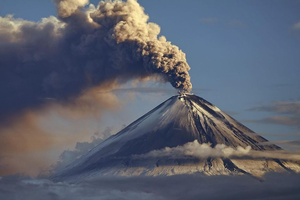

In [5]:
# 3) Измените размер изображения и сохраните его в файл (PIL и OpenCV)

pil_im_to_save = image_pil.resize((300,200), pil.Image.Resampling.LANCZOS)
pil_im_to_save

In [6]:
pil_im_to_save.save('pil_resized_image.png')

In [7]:
cv_im_to_save = cv.resize(image_cv ,(300,200))
cv.imwrite('cv_resized_image.png', cv_im_to_save)

True

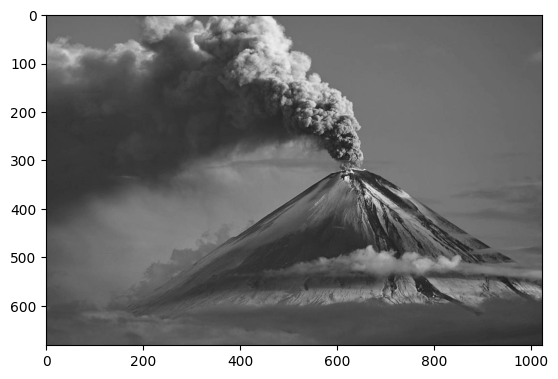

In [8]:
# 4) Преобразуйте изображение в оттенки серого (grayscale)

plt.imshow(
    cv.imread('img.png', cv.IMREAD_GRAYSCALE),
    'gray',
)

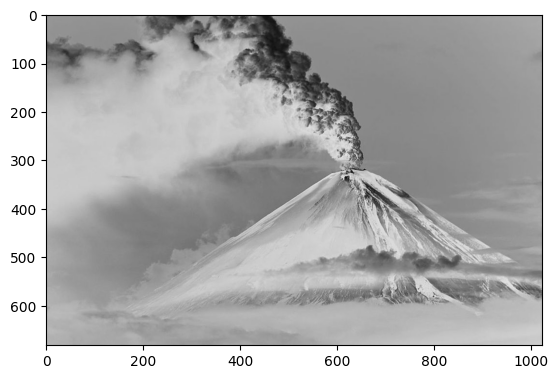

In [9]:
# 5) Преобразуйте изображение в негатив

plt.imshow(
    cv.cvtColor(
        cv.bitwise_not(
            cv.imread('img.png', cv.IMREAD_GRAYSCALE),
        ),
    cv.COLOR_BGR2RGB,
    )
)

(array([1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00, 6.0000e+00,
        6.0000e+00, 7.0000e+00, 8.0000e+00, 1.4000e+01, 1.2000e+01,
        2.0000e+01, 2.1000e+01, 2.5000e+01, 3.9000e+01, 4.1000e+01,
        4.8000e+01, 5.4000e+01, 9.0000e+01, 1.0700e+02, 1.2700e+02,
        1.6500e+02, 2.1400e+02, 2.5900e+02, 3.3700e+02, 3.9200e+02,
        4.2500e+02, 5.0900e+02, 5.7800e+02, 6.4800e+02, 7.8300e+02,
        7.9600e+02, 9.1800e+02, 1.0310e+03, 1.3120e+03, 1.5500e+03,
        2.0830e+03, 2.4340e+03, 3.1730e+03, 5.0360e+03, 5.2820e+03,
        5.0050e+03, 6.5040e+03, 8.0830e+03, 1.3228e+04, 1.7277e+04,
        1.1965e+04, 9.8530e+03, 8.9220e+03, 7.2330e+03, 6.6790e+03,
        5.5250e+03, 5.2530e+03, 5.1100e+03, 5.1910e+03, 5.4700e+03,
        6.3120e+03, 6.6720e+03, 5.8880e+03, 5.3640e+03, 5.5460e+03,
        5.8150e+03, 6.2430e+03, 6.9530e+03, 6.66

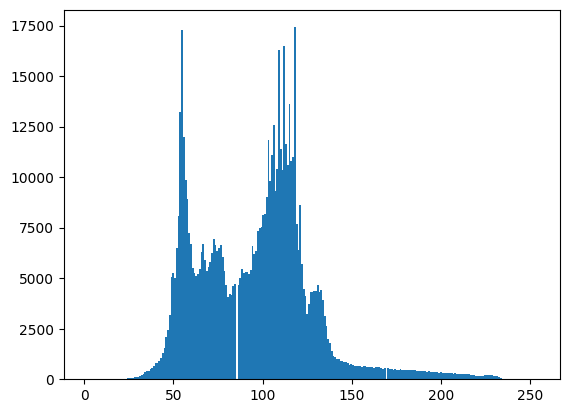

In [10]:
# 6) Примените различные методы бинаризации к изображениям (пороговая и адаптивная сегментация) и сравните их

image_gray = cv.cvtColor(image_cv.astype(np.uint8), cv.COLOR_BGR2GRAY)
plt.hist(image_gray.flatten(), bins=256)

In [13]:
_, ex_normal = cv.threshold(image_gray, 80, 255, cv.THRESH_BINARY)
ex_adaptive_mean = cv.adaptiveThreshold(image_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 5, 1)
ex_adaptive_gauss = cv.adaptiveThreshold(image_gray,255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 1)

examples = {
    "original" : image_gray,
    "normal threshold": ex_normal,
    "adaptive mean": ex_adaptive_mean,
    "adaptive gaussian": ex_adaptive_gauss,
}

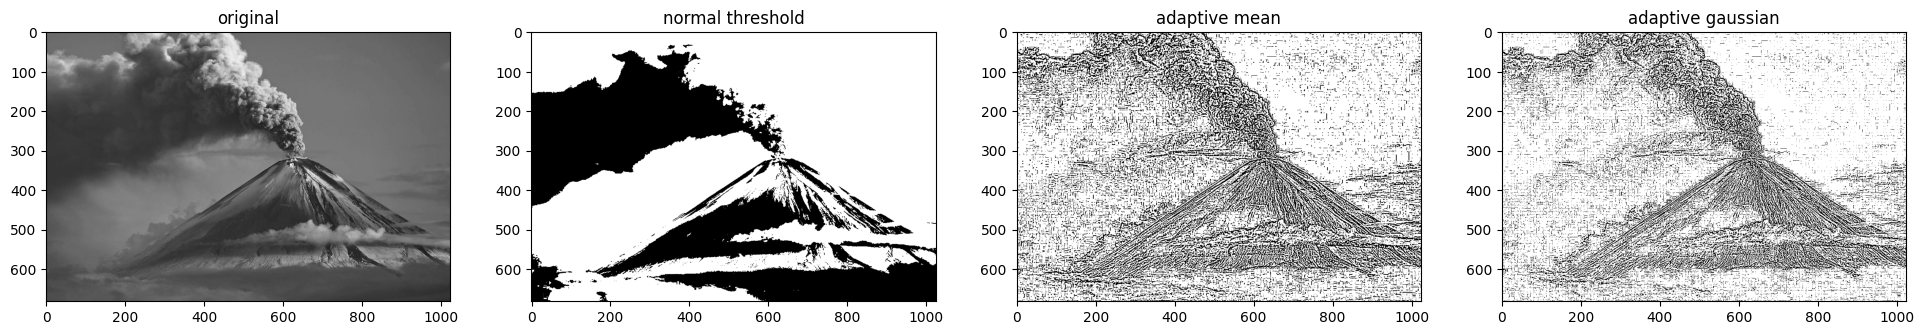

In [14]:
f, axs = plt.subplots(1, 4, figsize=(24, 10))
for idx, (tittle, example) in enumerate(examples.items()):
    axs[idx].imshow(example,'gray')
    axs[idx].set_title(tittle)
plt.show()

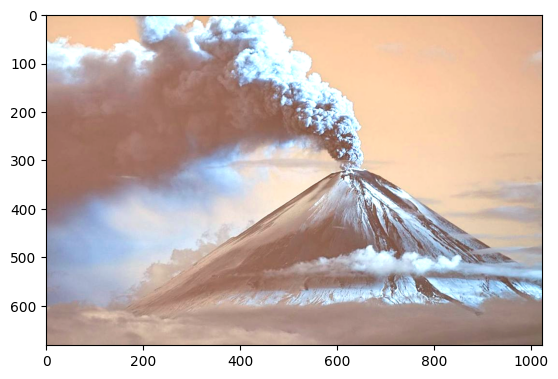

In [105]:
contrast = 1.5
brightness = 30
image_gray_converted = cv.convertScaleAbs(image_cv, alpha=contrast, beta=brightness)
plt.imshow(image_gray_converted, 'gray')

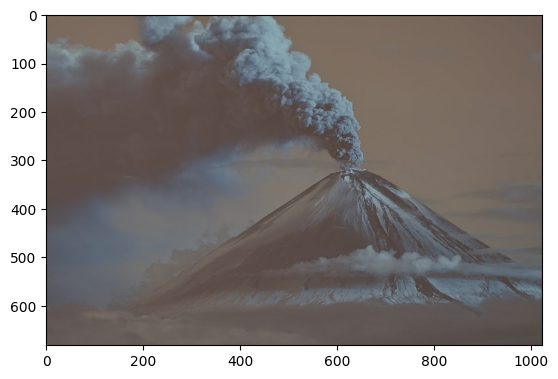

In [90]:
contrast = 0.5
brightness = 50

image_gray_converted2 = cv.convertScaleAbs(image_cv, alpha=contrast, beta=brightness)
plt.imshow(image_gray_converted2, 'gray')

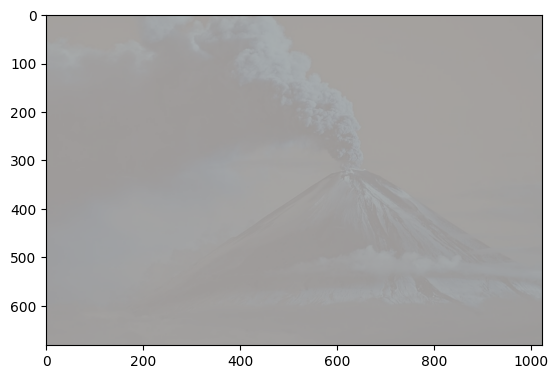

In [91]:
contrast = 0.1
brightness = 150

image_gray_converted3 = cv.convertScaleAbs(image_cv, alpha=contrast, beta=brightness)
plt.imshow(image_gray_converted3, 'gray')

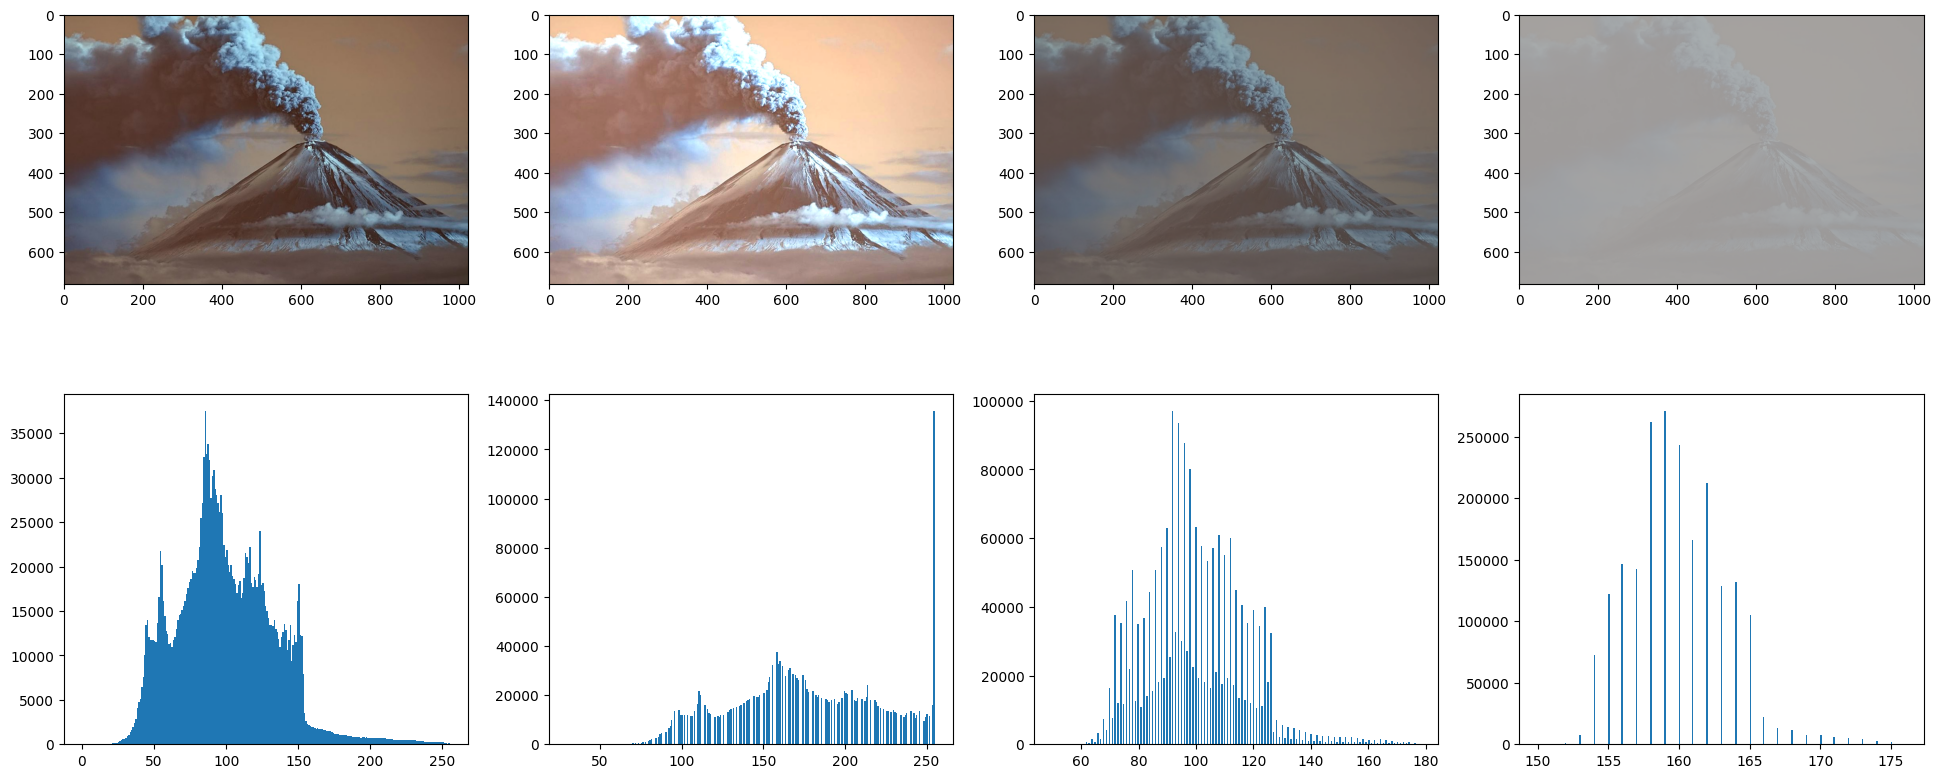

In [92]:
f, axs = plt.subplots(2, 4, figsize=(24, 10))
for idx, imge in enumerate([image_cv, image_gray_converted, image_gray_converted2, image_gray_converted3]):
    axs[0][idx].imshow(imge,'gray')
    axs[1][idx].hist(imge.flatten(), bins=255)
plt.show()

In [117]:
def customConvertScaleAbs(img, alpha=1, beta=0):
    res = np.abs((img * alpha + beta))
    return np.where(res < 255, res, 255).astype(np.uint8)

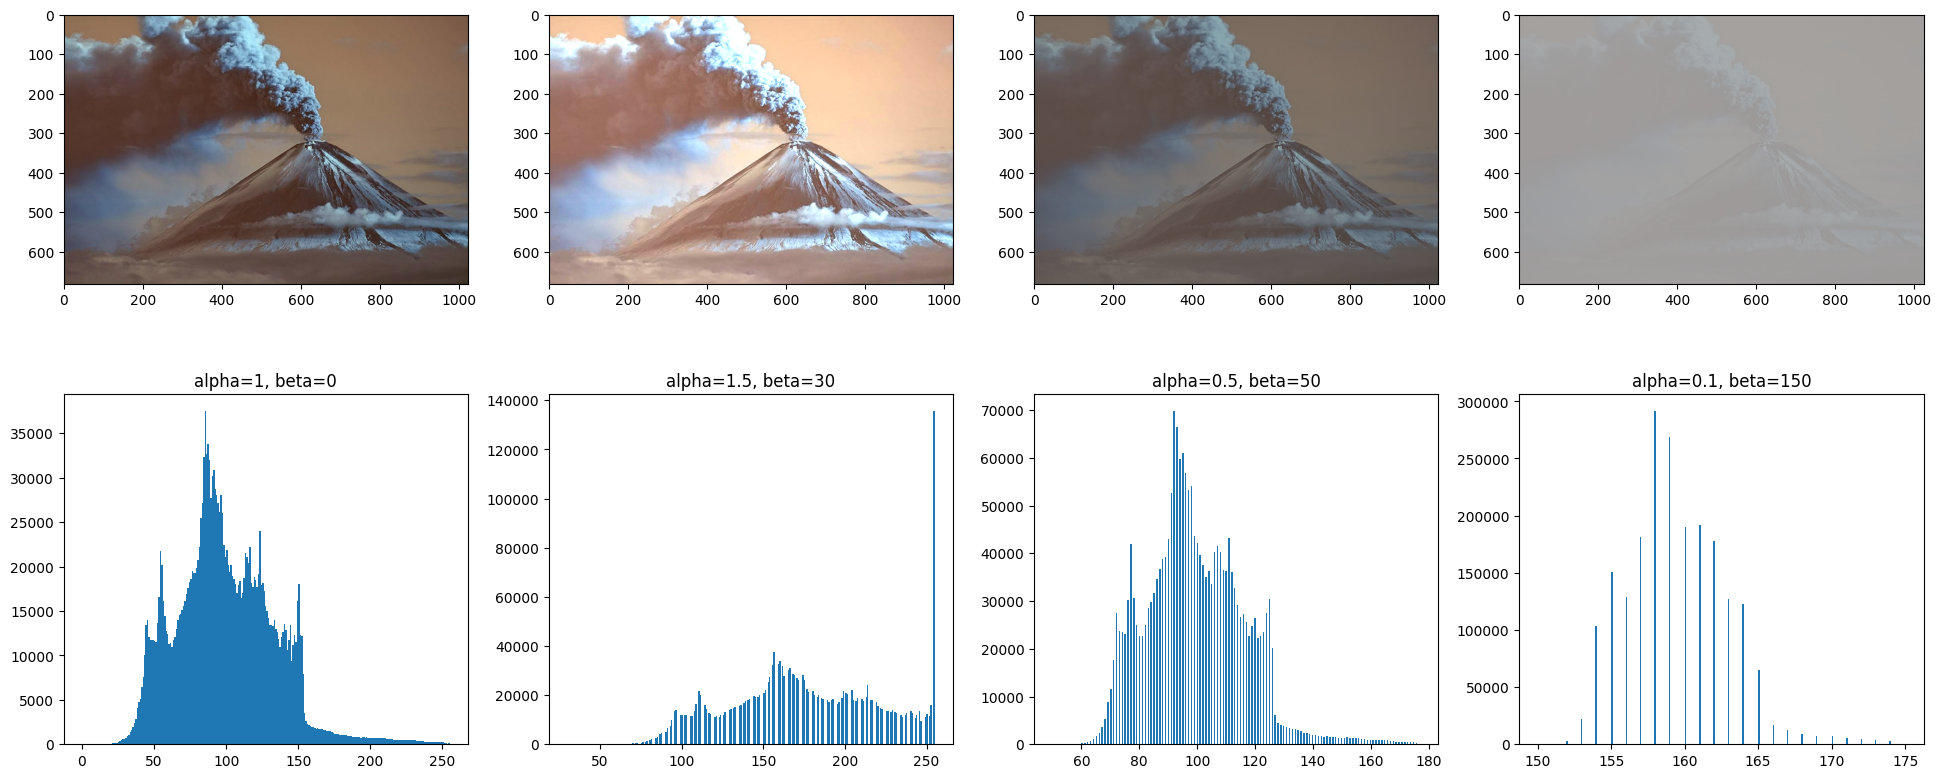

In [119]:
f, axs = plt.subplots(2, 4, figsize=(24, 10))
for idx, (_alpha, _beta) in enumerate([(1, 0), (1.5, 30), (0.5, 50),(0.1, 150)]):
    im = customConvertScaleAbs(image_cv, alpha=_alpha, beta=_beta)
    axs[0][idx].imshow(im,'gray')
    axs[1][idx].hist(im.flatten(), bins=255)
    axs[1][idx].set_title(f'alpha={_alpha}, beta={_beta}')
plt.show()

(array([2.00000e+01, 0.00000e+00, 1.00000e+00, 3.00000e+00, 3.00000e+00,
        0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00,
        7.00000e+00, 8.00000e+00, 0.00000e+00, 5.00000e+00, 0.00000e+00,
        1.10000e+01, 0.00000e+00, 9.00000e+00, 1.30000e+01, 0.00000e+00,
        1.10000e+01, 0.00000e+00, 1.50000e+01, 1.70000e+01, 2.50000e+01,
        0.00000e+00, 0.00000e+00, 2.40000e+01, 0.00000e+00, 4.40000e+01,
        5.00000e+01, 4.20000e+01, 0.00000e+00, 0.00000e+00, 6.70000e+01,
        0.00000e+00, 1.03000e+02, 1.24000e+02, 1.88000e+02, 0.00000e+00,
        1.94000e+02, 0.00000e+00, 0.00000e+00, 2.62000e+02, 3.16000e+02,
        4.35000e+02, 0.00000e+00, 5.44000e+02, 0.00000e+00, 6.23000e+02,
        0.00000e+00, 7.23000e+02, 9.27000e+02, 0.00000e+00, 1.02300e+03,
        0.00000e+00, 1.41800e+03, 1.57500e+03, 1.95900e+03, 0.00000e+00,
        0.00000e+00, 2.42600e+03, 0.00000e+00, 2.84100e+03, 4.07300e+03,
        4.76200e+03, 0.00000e+00, 0.00000e+00, 5.11

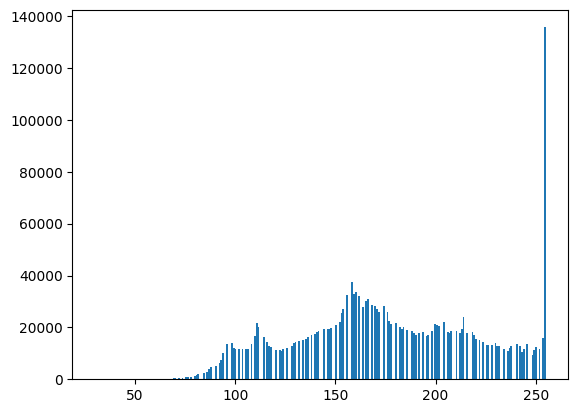

In [110]:
contrast = 1.5
brightness = 30
image_gray_converted = cv.convertScaleAbs(image_cv, alpha=contrast, beta=brightness)
plt.hist(image_gray_converted.flatten(), bins=255)

In [151]:
def AddContrastFilter(img_in, coef_correction):
    b, g, r = cv.split(img_in)
    lab = (r * 0.299 + g * 0.587 + b * 0.114).mean()

    # Коэффициент коррекции
    k = 1.0 + coef_correction / 100.0
    p = np.array([ lab + k * (i - lab) for i in range(0, 256) ])
    p = np.where(p < 0, 0, p)
    p = np.where(p > 255, 255, p)

    img = np.where( True, p[img_in], None)
    img = np.where(img < 0, 0, img)
    img = np.where(img > 255, 255, img)
    return img.astype(np.uint8)


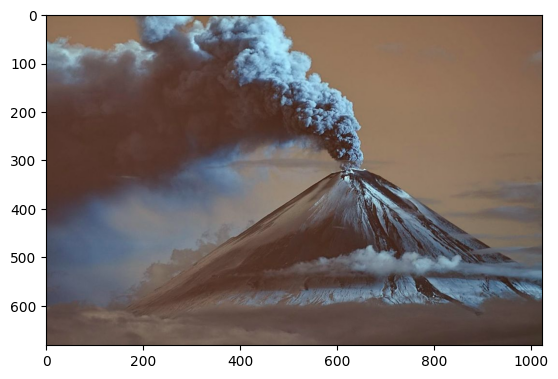

In [152]:
plt.imshow(image_cv)

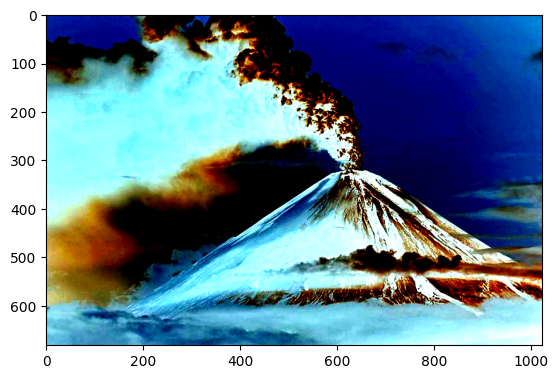

In [153]:
plt.imshow(AddContrastFilter(image_cv, -600))

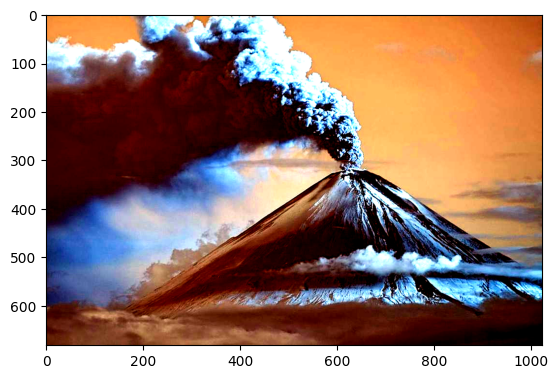

In [154]:
plt.imshow(AddContrastFilter(image_cv, 250))

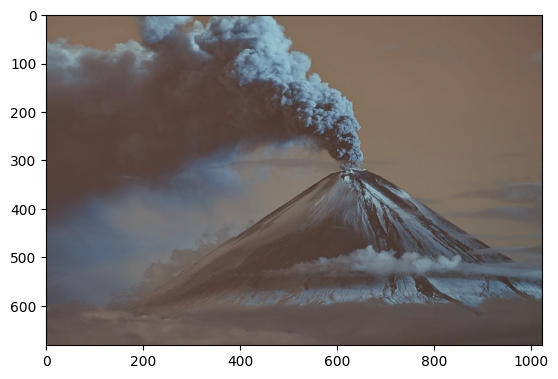

In [159]:
plt.imshow(AddContrastFilter(image_cv, -30))

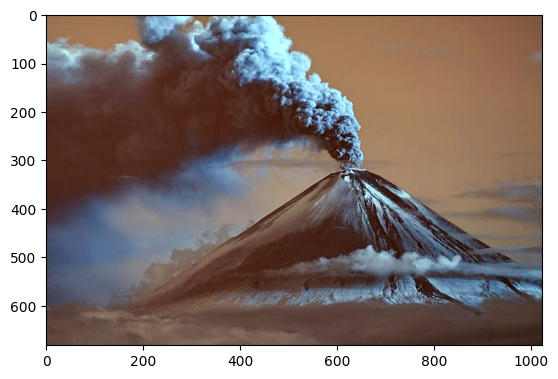

In [160]:
plt.imshow(AddContrastFilter(image_cv, 30))